<a href="https://colab.research.google.com/github/gulabpatel/TimeSeries/blob/main/22%3A%20Darts_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Using Darts Library

Darts documentation : https://pypi.org/project/darts/

In [ ]:
!pip install darts

In [1]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [3]:
AirPassengersDataset().load()

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample

In [2]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

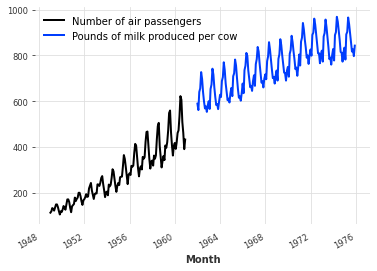

In [4]:
import matplotlib.pyplot as plt
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label='Number of air passengers')
series_milk.plot(label='Pounds of milk produced per cow')
plt.legend();

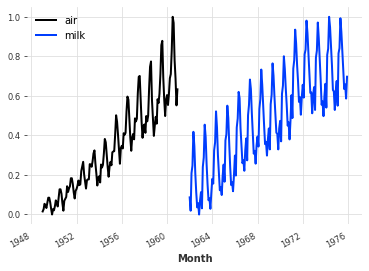

In [5]:
from darts.dataprocessing.transformers import Scaler
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label='air')
series_milk_scaled.plot(label='milk')
plt.legend();

In [6]:
# Train And Validation Split
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

In [7]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [8]:
model_air_milk = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [9]:
model_air_milk.fit([train_air, train_milk], verbose=True)

[2021-10-01 09:21:08,165] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-10-01 09:21:08,165] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-10-01 09:21:08,304] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-01 09:21:08,304] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:02<04:02,  2.45s/it]

 11%|█         | 11/100 [00:22<02:52,  1.94s/it]

 21%|██        | 21/100 [00:45<03:25,  2.60s/it]

 31%|███       | 31/100 [01:20<03:57,  3.44s/it]

 41%|████      | 41/100 [01:55<02:57,  3.01s/it]

 51%|█████     | 51/100 [02:30<02:30,  3.08s/it]

 61%|██████    | 61/100 [03:06<02:12,  3.40s/it]

 71%|███████   | 71/100 [03:41<01:37,  3.37s/it]

 81%|████████  | 81/100 [04:10<00:43,  2.30s/it]

 91%|█████████ | 91/100 [04:29<00:17,  1.89s/it]

100%|██████████| 100/100 [04:46<00:00,  2.86s/it]


MAPE = 5.51%


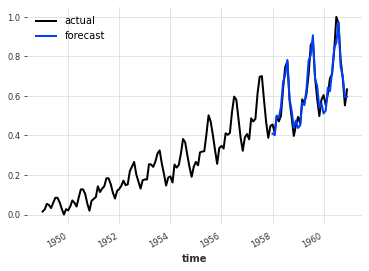

In [10]:
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))

MAPE = 11.75%


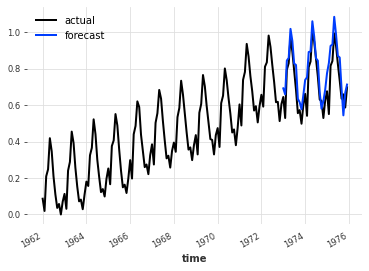

In [11]:
pred = model_air_milk.predict(n=36, series=train_milk)

series_milk_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))

-----------------------------